In [1]:
# General data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('boston.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

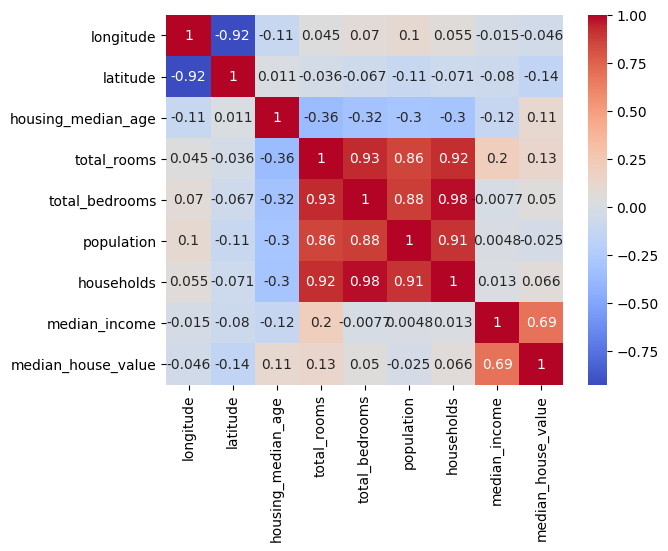

In [3]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [4]:
df.dropna(axis=0, inplace=True)
df = pd.get_dummies(df, columns=['ocean_proximity'])

In [10]:
y = df['median_house_value']
X = df.drop(['median_house_value', 'households','total_bedrooms'], axis=1)
print(X.shape, y.shape)

# convert to numpy array
X = np.array(X)
y = np.array(y)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=43)

# use minMax scaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train)
X_test = s_scaler.transform(X_test)

(20433, 10) (20433,)


In [15]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],),input_dim = 13 ,activation='relu')) # (features,)
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear')) # output node
model.summary() # see what your model looks like

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0015), loss='mean_squared_error', metrics=['mae'])
# es = EarlyStopping(monitor='val_loss',
#                    mode='min',
#                    patience=50,
#                    restore_best_weights = True)

hist =model.fit(X_train, y_train,
            validation_data=(X_test, y_test),
                    # callbacks=[es],
            epochs=100,
            batch_size=32,
            verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               5632      
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 64)                8256      
                                                                 
 dense_40 (Dense)            (None, 32)                2080      
                                                                 
 dense_41 (Dense)            (None, 1)                 33        
                                                                 
Total params: 180,225
Trainable params: 180,225
Non-tr

In [16]:
pred = model.predict(X_test)
trainpreds = model.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

511/511 [==============================] - 1s 3ms/step
36437.57292757976
38712.04663701217


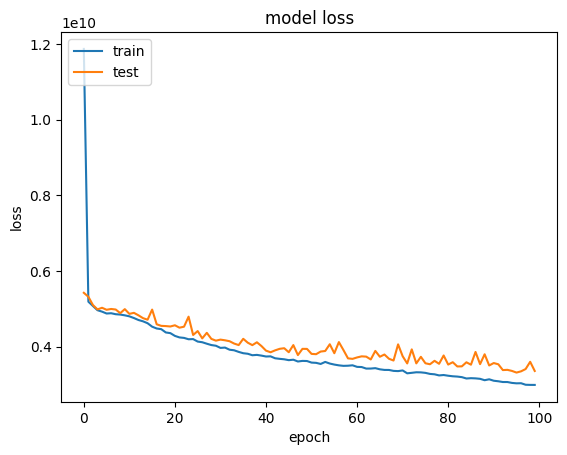

In [17]:
# plotting validation and training error
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()